In [1]:
# 데이터 분석 패키지
import numpy as np
import pandas as pd

In [106]:
# 모든 컬럼을 출력하도록 설정
pd.set_option('display.max_columns', None)  # None으로 설정하면 모든 컬럼 출력
# 모든 행을 출력하도록 설정
pd.set_option('display.max_rows', None)  # None으로 설정하면 모든 행 출력

In [3]:
# 시각화 패키지
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# matplotlib 한글지원 패키지
import koreanize_matplotlib

In [5]:
# 날짜는 파이썬 표준라이브러리 datetime 사용
import datetime
# 오늘 날짜 구하기
today = datetime.datetime.today()
today = today.strftime('%Y-%m-%d')
today

'2024-12-19'

In [7]:
df_etfs = pd.read_csv(f'new_etf_{today}.csv')

In [8]:
df_etfs.shape

(930, 17)

In [9]:
df_etfs.head(1)

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,Brand,인버스,레버리지,헤지
0,459580,6,채권,KODEX CD금리액티브(합성),1057560,2,300,0.03,1057346.0,0.8398,289552,306219,95099,KODEX,False,False,False


In [10]:
df_etfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930 entries, 0 to 929
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Symbol        930 non-null    object 
 1   Category      930 non-null    int64  
 2   CategoryName  930 non-null    object 
 3   Name          930 non-null    object 
 4   Price         930 non-null    int64  
 5   RiseFall      930 non-null    int64  
 6   Change        930 non-null    int64  
 7   ChangeRate    930 non-null    float64
 8   NAV           930 non-null    float64
 9   EarningRate   870 non-null    float64
 10  Volume        930 non-null    int64  
 11  Amount        930 non-null    int64  
 12  MarCap        930 non-null    int64  
 13  Brand         930 non-null    object 
 14  인버스           930 non-null    bool   
 15  레버리지          930 non-null    bool   
 16  헤지            930 non-null    bool   
dtypes: bool(3), float64(3), int64(7), object(4)
memory usage: 104.6+ KB


In [11]:
# 결측치 확인
df_etfs.isna().sum()

Symbol           0
Category         0
CategoryName     0
Name             0
Price            0
RiseFall         0
Change           0
ChangeRate       0
NAV              0
EarningRate     60
Volume           0
Amount           0
MarCap           0
Brand            0
인버스              0
레버리지             0
헤지               0
dtype: int64

In [12]:
# 결측치의 비율확인
df_etfs.isna().mean()*100

Symbol          0.000000
Category        0.000000
CategoryName    0.000000
Name            0.000000
Price           0.000000
RiseFall        0.000000
Change          0.000000
ChangeRate      0.000000
NAV             0.000000
EarningRate     6.451613
Volume          0.000000
Amount          0.000000
MarCap          0.000000
Brand           0.000000
인버스             0.000000
레버리지            0.000000
헤지              0.000000
dtype: float64

<Axes: >

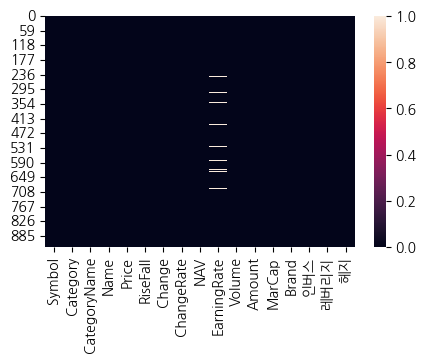

In [16]:
plt.figure(figsize=(5,3))
sns.heatmap(df_etfs.isna())

In [22]:
df_etfs.describe(include='O')

,Symbol,CategoryName,Name,Brand
count,930,930,930,930
unique,930,7,930,27
top,459580,해외주식,KODEX CD금리액티브(합성),KODEX
freq,1,295,1,202


In [21]:
df_etfs.describe(include=np.int64)

,Category,Price,RiseFall,Change,Volume,Amount,MarCap
count,930.000000,9.300000e+02,930.000000,930.000000,9.300000e+02,930.000000,930.000000
mean,3.763441,2.657295e+04,4.413978,-226.956989,3.969577e+05,3779.034409,1833.333333
std,1.842553,7.121737e+04,1.172716,362.485886,4.250966e+06,21250.799938,6266.581075
min,1.000000,1.351000e+03,2.000000,-4165.000000,0.000000e+00,0.000000,9.000000
25%,2.000000,9.282500e+03,5.000000,-315.000000,1.079500e+03,15.000000,83.250000
50%,4.000000,1.190750e+04,5.000000,-170.000000,9.066500e+03,121.000000,249.500000
75%,6.000000,1.873375e+04,5.000000,-35.000000,5.967850e+04,910.250000,1089.000000
max,7.000000,1.057560e+06,5.000000,975.000000,1.167454e+08,306219.000000,95099.000000


In [82]:
# subset 범주형 변수에 대해서
# df_cat = df_etfs[['CategoryName','Brand','RiseFall']]
df_cat = df_etfs.select_dtypes(np.object_).drop(['Symbol','Name'], axis=1).assign(RiseFall=df_etfs['RiseFall'])
# df_cat['RiseFall'] = df_etfs['RiseFall']
df_cat.head(2)

,CategoryName,Brand,RiseFall
0,채권,KODEX,2
1,채권,TIGER,2


In [84]:
# 수치형 변수에 대해서
# df_num = df_etfs[['Price','Change','Volume','Amount','MarCap']]
df_num = df_etfs.select_dtypes(np.number).drop(['Category','RiseFall'],axis=1)
df_num.head(1)

,Price,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
0,1057560,300,0.03,1057346.0,0.8398,289552,306219,95099


#### 시각화 - 범주형 변수

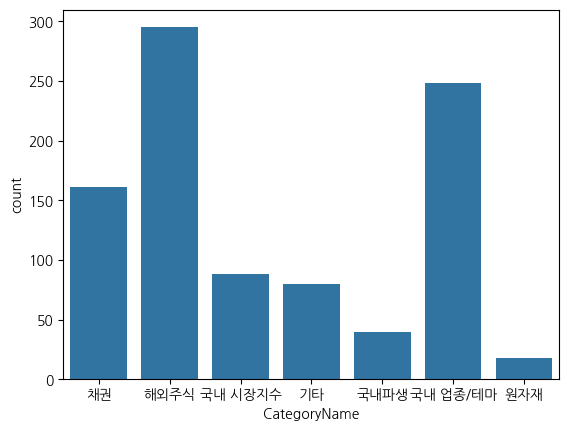

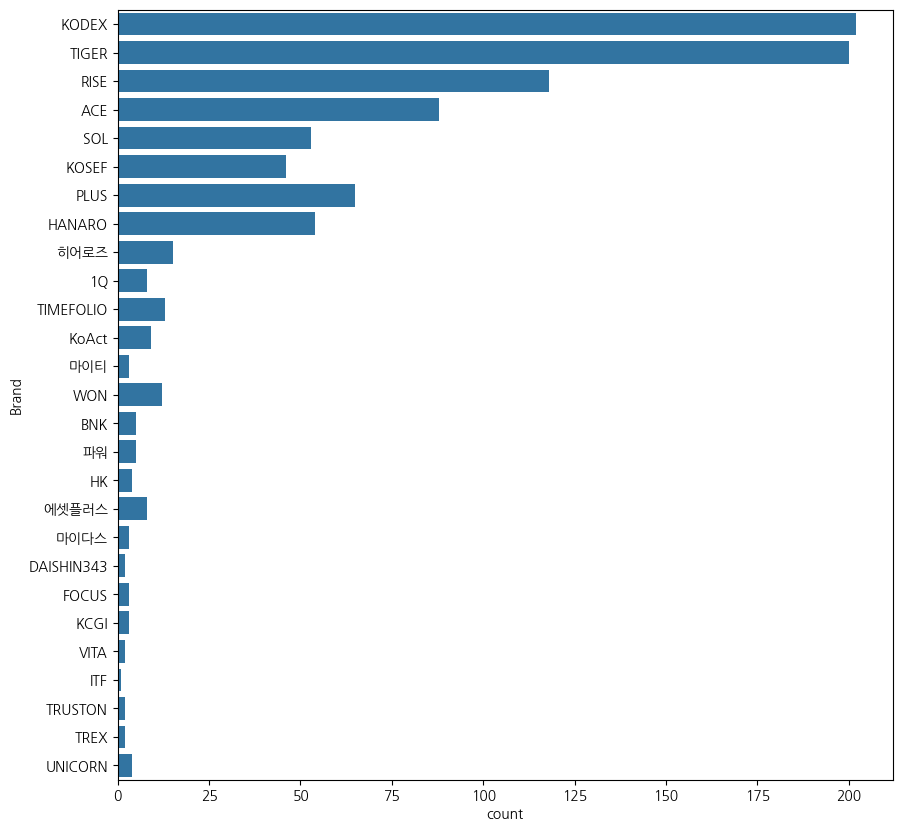

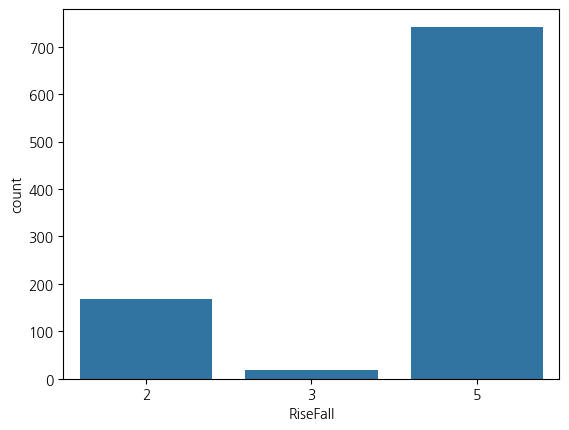

In [ ]:
sns.countplot(data=df_cat,x='CategoryName')
plt.show()

plt.figure(figsize=(10,10))
sns.countplot(data=df_cat,y='Brand')

# plt.gca()는 Matplotlib의 함수로, "Get Current Axes"의 약자입니다. 이 함수를 사용하면 현재 활성화된 Axes 객체를 반환합니다. 
# 즉, 현재 그림에서 가장 최근에 생성된 Axes(좌표축)에 대한 참조를 가져올 수 있습니다.
ax = plt.gca()

plt.show()
sns.countplot(data=df_cat,x='RiseFall')
plt.show()

d:\kdt\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


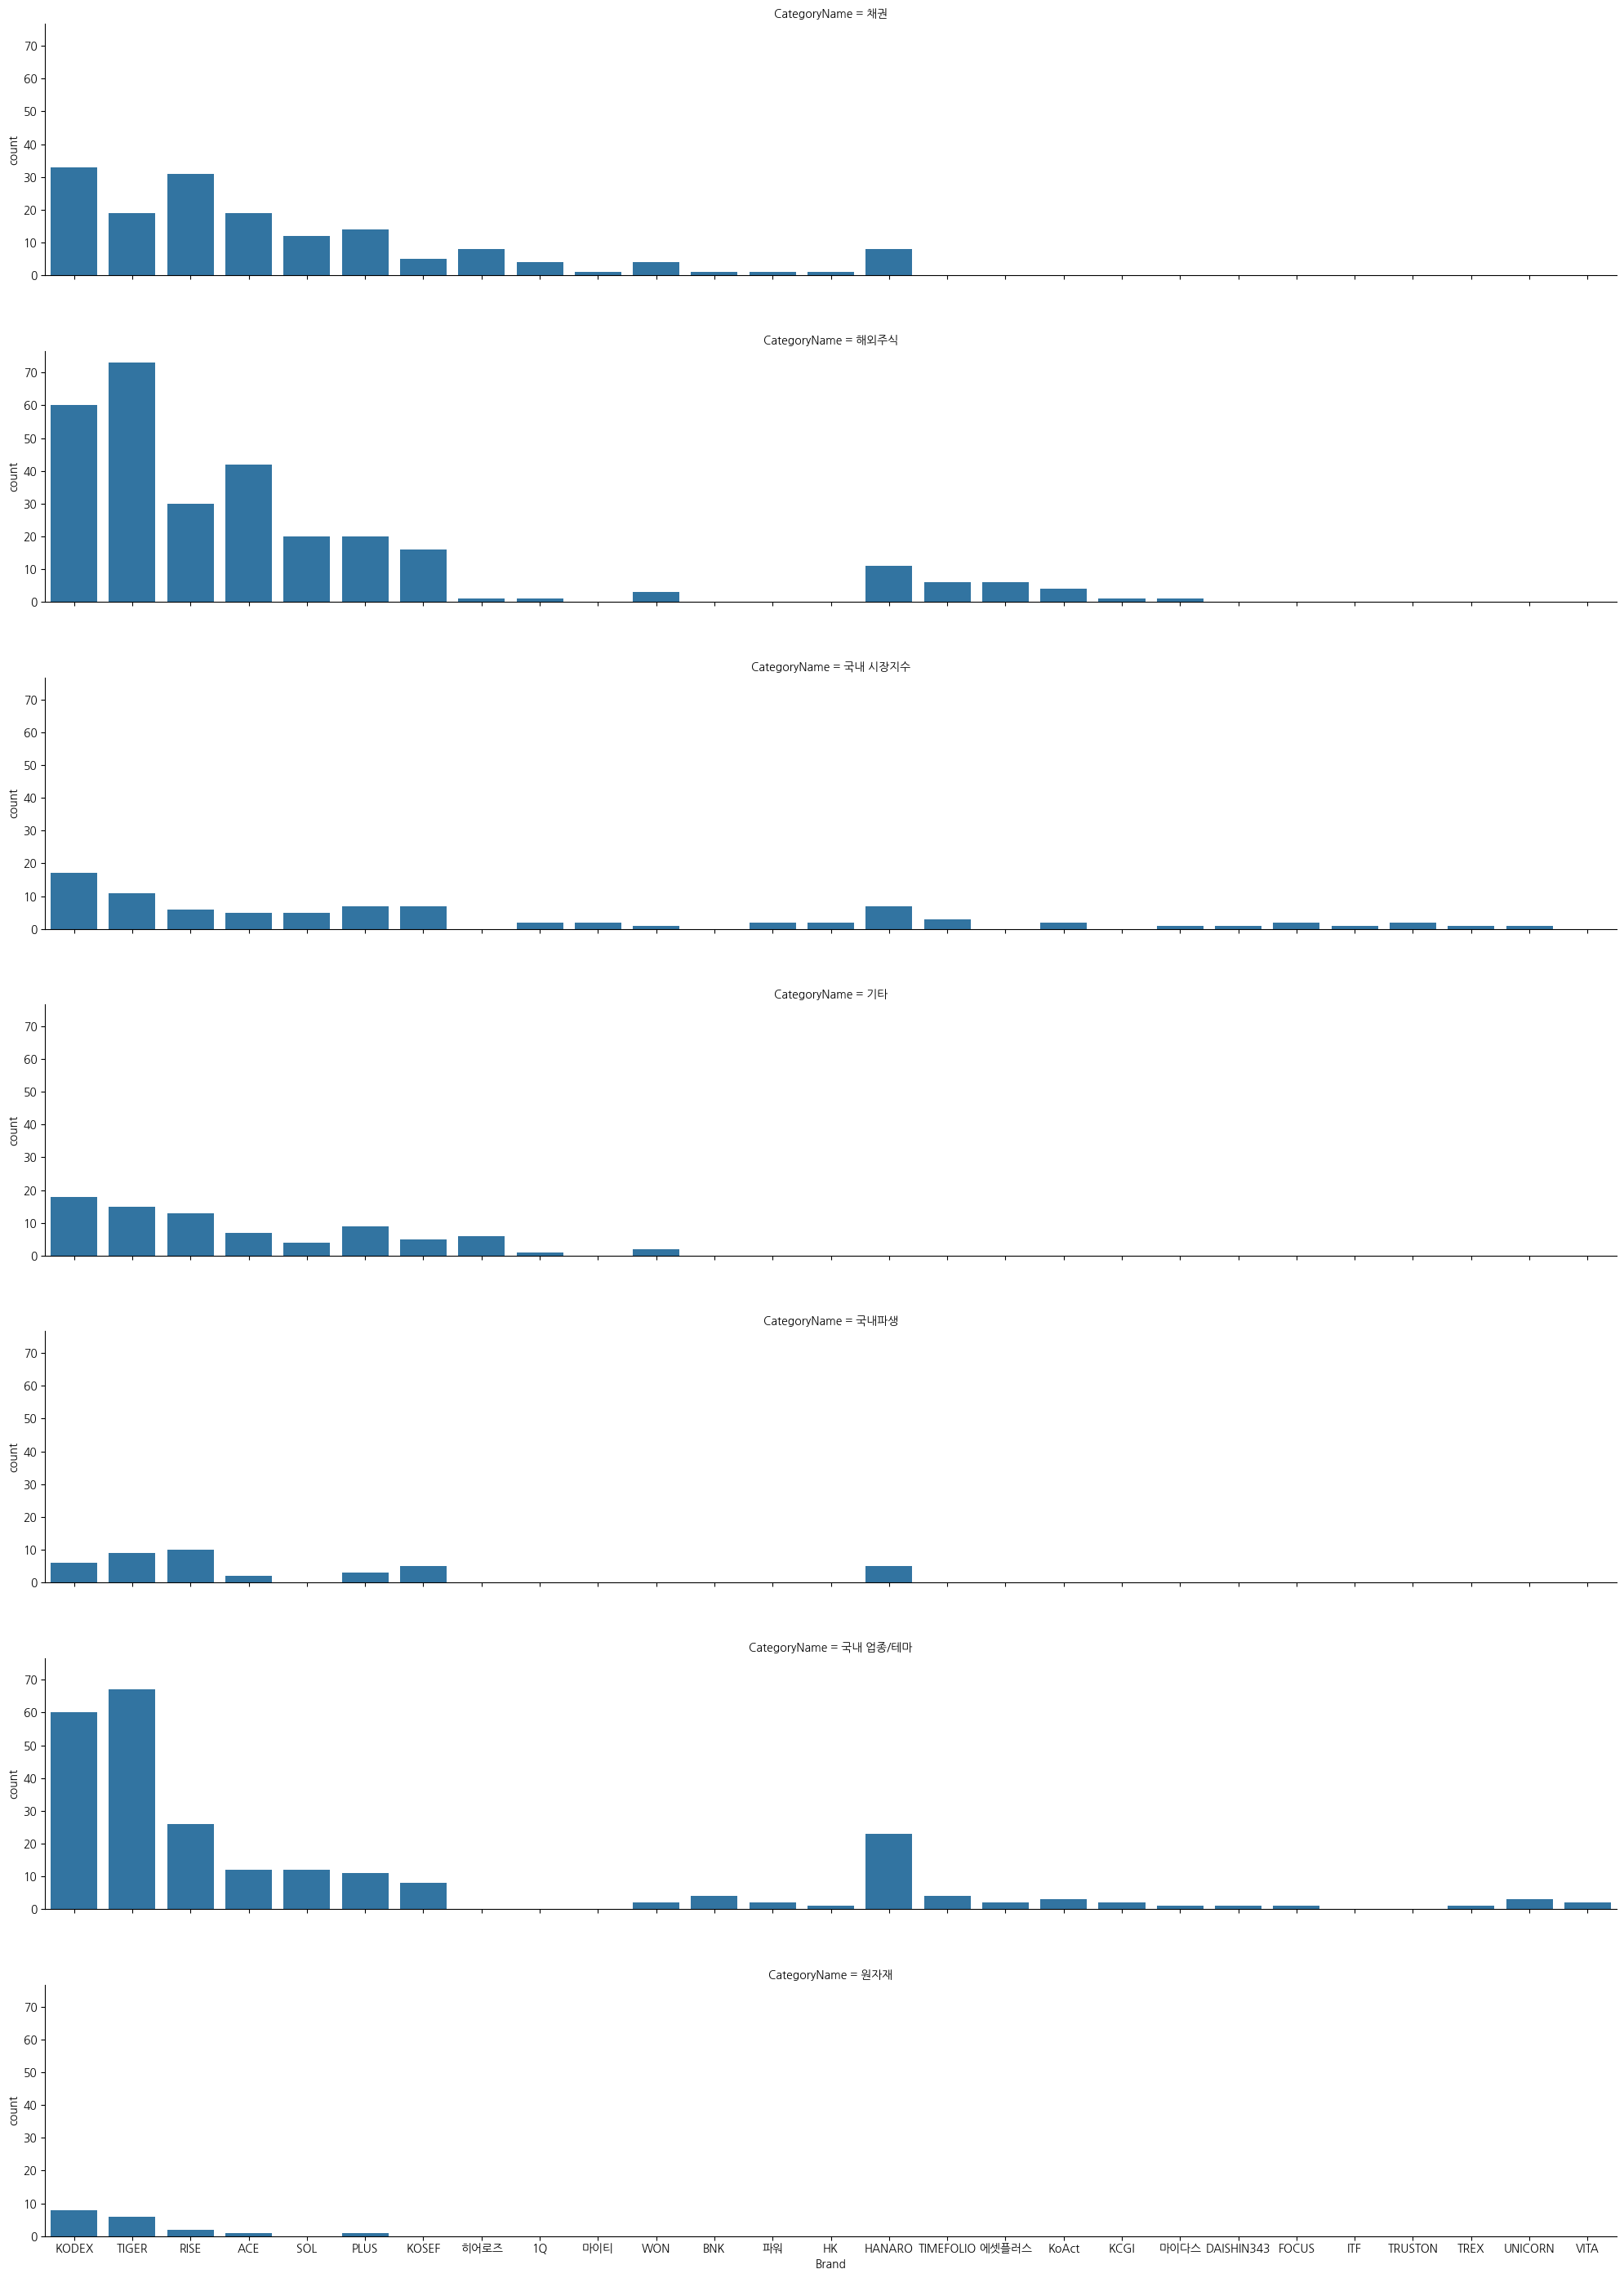

In [ ]:
# 카테고리별 Brand 수 
# piechart가 더 보기좋을거같은느낌 -> 저녁에 해보기기
g = sns.FacetGrid(data=df_etfs, col='CategoryName', col_wrap=1, height=4, aspect=2)
g.map(sns.countplot, 'Brand')
plt.subplots_adjust(hspace=0.3)
plt.show()


d:\kdt\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


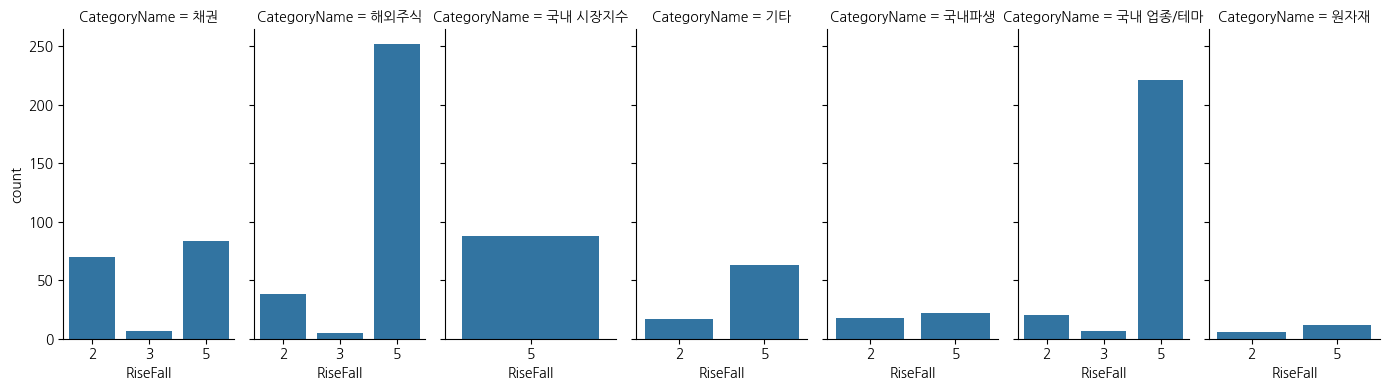

In [54]:
# 카테고리별 상승/하락 건수수
g = sns.FacetGrid(data=df_etfs, col='CategoryName', height=4,aspect=0.5,sharex=False)
g.map(sns.countplot, 'RiseFall')
plt.subplots_adjust(hspace=0.5)
plt.show()

In [44]:
df_etfs['CategoryName'].sort_values().unique()

array(['국내 시장지수', '국내 업종/테마', '국내파생', '기타', '원자재', '채권', '해외주식'],
      dtype=object)

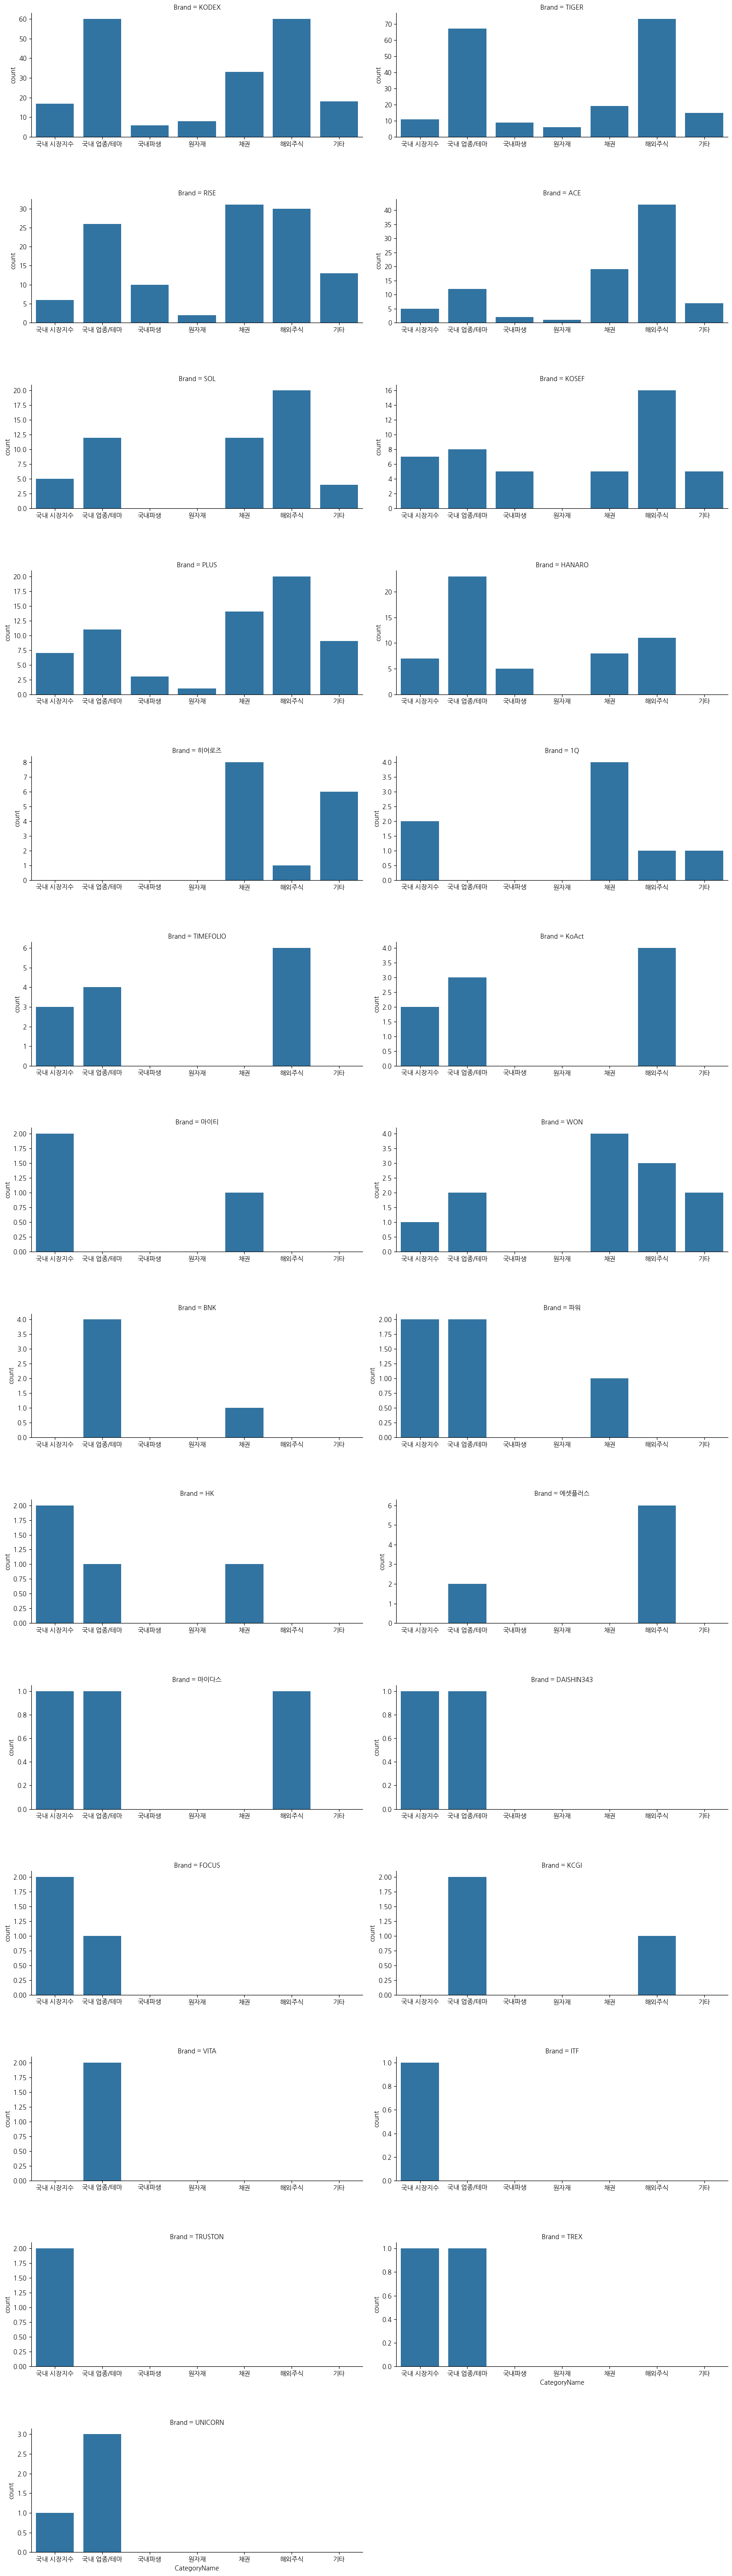

In [46]:
# 브랜드별 카테고리수
# sharex : default값이 True -> x축을 공유함 -> 맨밑에 하나만 x 라벨이 표기됨
g = sns.FacetGrid(data=df_etfs, col='Brand', col_wrap=2, height=4, aspect=2,sharex=False, sharey=False)
g.map(sns.countplot, 'CategoryName', order=['국내 시장지수', '국내 업종/테마', '국내파생','원자재', '채권', '해외주식','기타'])
plt.subplots_adjust(hspace=0.5)
plt.show()

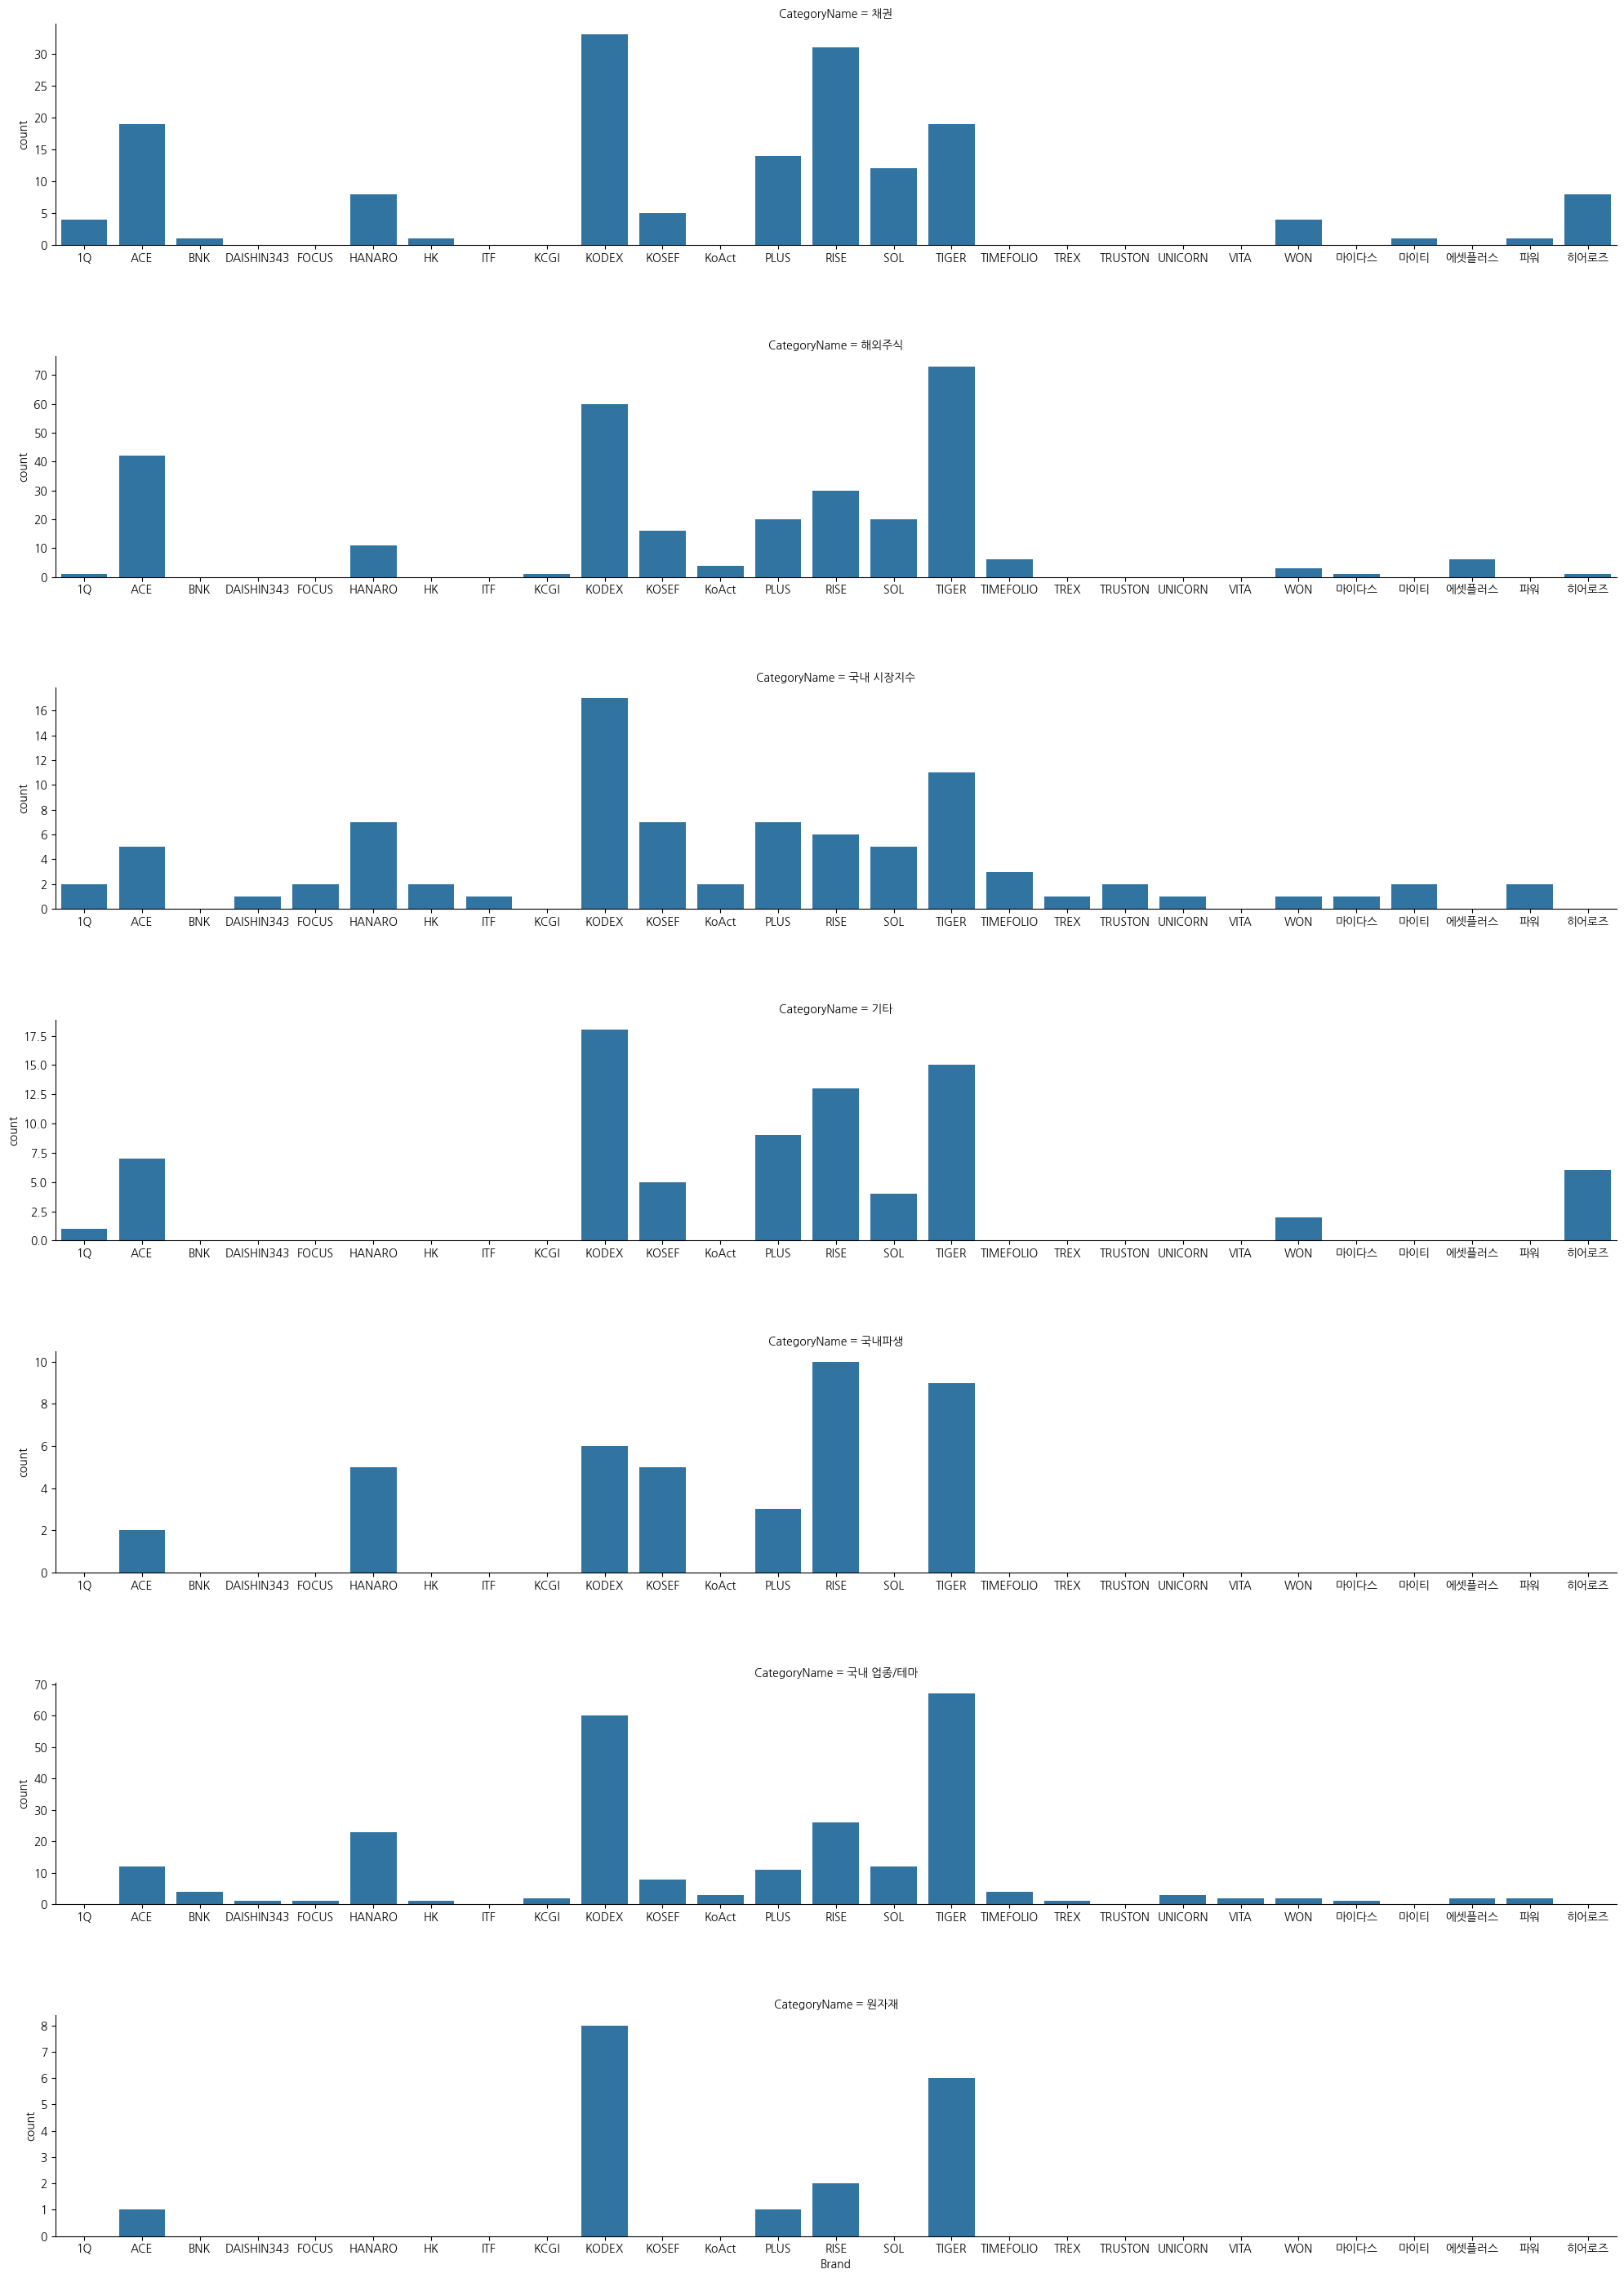

In [49]:
# 카테고리별 브랜드 수
# pie안에 pie차트?
g = sns.FacetGrid(data=df_etfs, col='CategoryName', col_wrap=1, height=4, aspect=5,sharex=False, sharey=False)
g.map(sns.countplot, 'Brand', order=df_etfs['Brand'].sort_values())
plt.subplots_adjust(hspace=0.5)
plt.show()

,Price,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
Price,1.000000,0.020606,0.121212,0.999991,-0.027831,-0.022387,0.288981,0.366352
Change,0.020606,1.000000,0.647373,0.020410,-0.133593,0.019746,-0.072252,-0.109678
ChangeRate,0.121212,0.647373,1.000000,0.121037,-0.009950,0.094466,-0.012502,0.003586
NAV,0.999991,0.020410,0.121037,1.000000,-0.027601,-0.022382,0.288998,0.366385
EarningRate,-0.027831,-0.133593,-0.009950,-0.027601,1.000000,-0.013222,0.014622,0.009617
Volume,-0.022387,0.019746,0.094466,-0.022382,-0.013222,1.000000,0.684528,0.142383
Amount,0.288981,-0.072252,-0.012502,0.288998,0.014622,0.684528,1.000000,0.579918
MarCap,0.366352,-0.109678,0.003586,0.366385,0.009617,0.142383,0.579918,1.000000


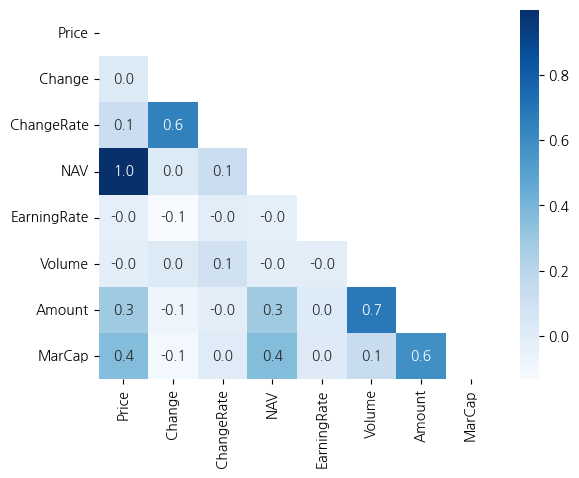

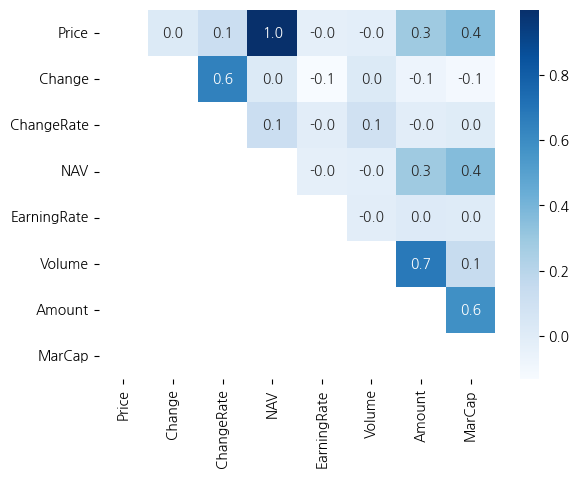

In [91]:
# 모든 수치형 변수간 상관관계
# 범위 : -1~1
# 양수 : 양의 상관관계 (같은 방향으로 움직임)
# 음수 : 음의 상관관계 (반대 방향으로로 움직임)
# 0 : 상관관계가 없다.

tmp = df_num.corr()
display(tmp)
# triu : 상단을 제거
sns.heatmap(tmp, cmap='Blues', annot=True, fmt='.1f', mask=np.triu(np.ones_like(tmp,dtype=bool)))
plt.show()

# tril : 하단을 제거
sns.heatmap(tmp, cmap='Blues', annot=True, fmt='.1f', mask=np.tril(np.ones_like(tmp,dtype=bool)))
plt.show()



In [92]:
df_num

,Price,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
0,1057560,300,0.03,1057346.0,0.8398,289552,306219,95099
1,55425,15,0.03,55424.0,0.8187,218161,12090,68508
2,21195,-465,-2.15,21193.0,17.1444,4928789,104522,64136
3,32330,-750,-2.27,32414.0,-3.7589,3830187,123991,55462
4,108975,15,0.01,108965.0,0.8328,44974,4900,43609
...,...,...,...,...,...,...,...,...
925,5260,-30,-0.57,5254.0,-7.8398,60,0,16
926,1951,-144,-6.87,1948.0,-1.1793,47674,93,16
927,6445,-60,-0.92,6457.0,-3.7010,126,0,15
928,16440,-390,-2.32,16424.0,29.4117,23,0,10


In [97]:
df_etfs.sort_values('MarCap',ascending=False).head(1)

,Symbol,Category,CategoryName,Name,Price,RiseFall,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap,Brand,인버스,레버리지,헤지
0,459580,6,채권,KODEX CD금리액티브(합성),1057560,2,300,0.03,1057346.0,0.8398,289552,306219,95099,KODEX,False,False,False


<Axes: xlabel='MarCap', ylabel='Count'>

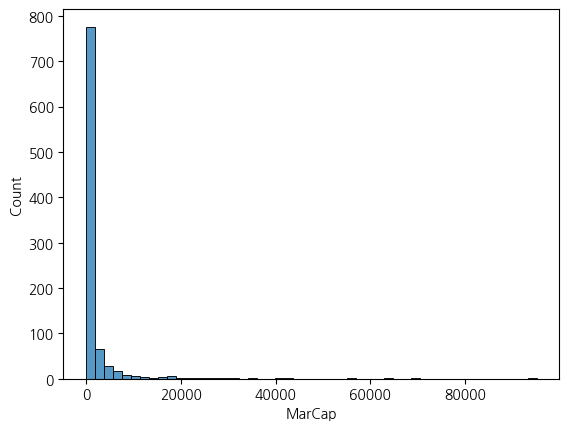

In [99]:
sns.histplot(data=df_num, x='MarCap', bins=50)

<Axes: ylabel='EarningRate'>

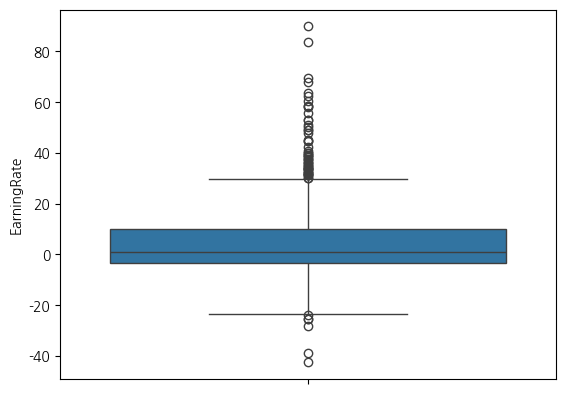

In [101]:
sns.boxplot(data=df_num, y='EarningRate')

In [104]:
q3 = df_num['EarningRate'].quantile(0.75)
q1 = df_num['EarningRate'].quantile(0.25)
irq = q3- q1

upper = q3 + 1.5 * irq
lower = q1 - 1.5 * irq
print(upper,lower)

30.220425 -23.687175


In [107]:
# 3개월 수익률 상한치 이상인 etf 종목
tmp = df_etfs[df_etfs['EarningRate'] >= upper]
tmp.to_excel('3개월 수익률 상한치 이상인 etf종목.xlsx')

d:\kdt\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning: Using the stripplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


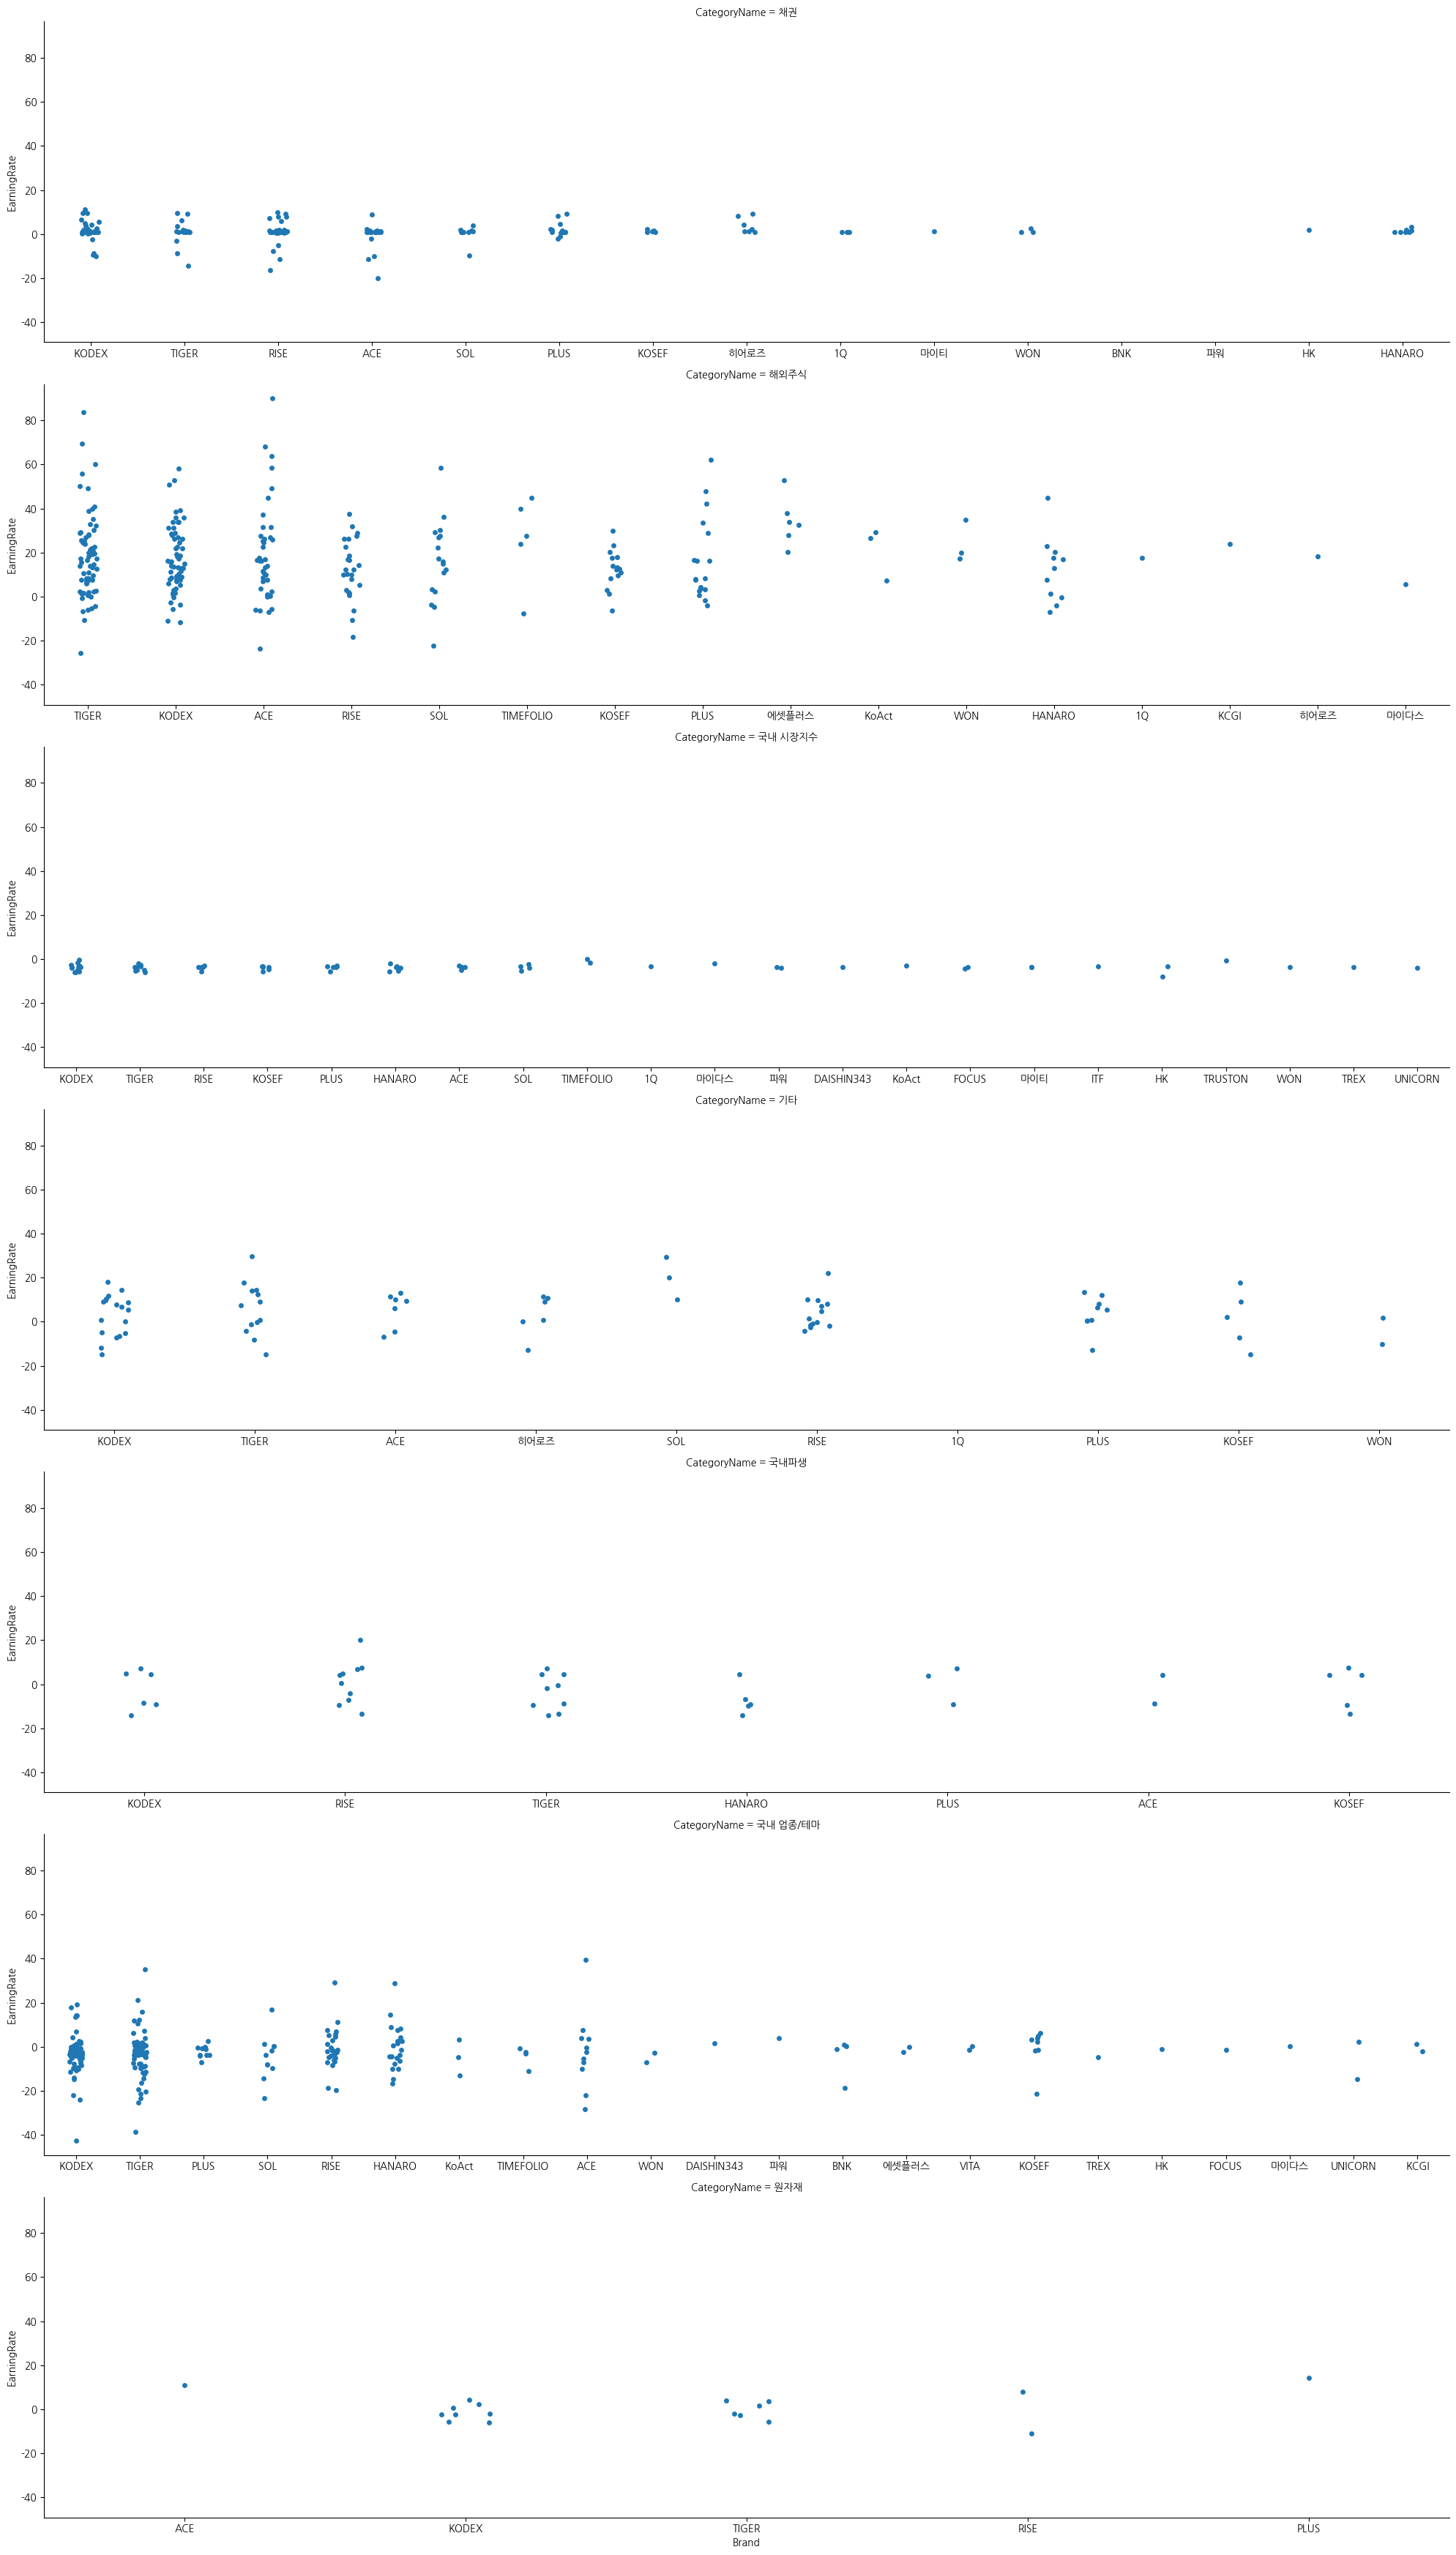

In [110]:
g = sns.FacetGrid(data=df_etfs, col='CategoryName',col_wrap=1, height=5,aspect=4, sharex=False)
g.map(sns.stripplot,'Brand','EarningRate')

In [168]:
# 컬럼별로 고유값 개수 확인하기
df_etfs.nunique()

Symbol          930
Category          7
CategoryName      7
Name            930
Price           837
RiseFall          3
Change          122
ChangeRate      266
NAV             901
EarningRate     871
Volume          585
Amount          263
MarCap          602
Brand            27
인버스               2
레버리지              2
헤지                2
dtype: int64

In [169]:
# 특정 컬럼 타입에 대해 서브 데이터 프레임 추출
display(df_etfs.select_dtypes(np.object_))
# 범주형 컬럼의 고유값 갯수
display(df_etfs.select_dtypes(np.object_).nunique())

,CategoryName,Name,Brand
0,채권,KODEX CD금리액티브(합성),KODEX
1,채권,TIGER CD금리투자KIS(합성),TIGER
2,해외주식,TIGER 미국S&P500,TIGER
3,국내 시장지수,KODEX 200,KODEX
4,채권,KODEX KOFR금리액티브(합성),KODEX
...,...,...,...
925,국내 시장지수,HANARO 200 TOP10,HANARO
926,국내 업종/테마,HANARO Fn골프테마,HANARO
927,국내 업종/테마,TIGER 200 산업재,TIGER
928,기타,SOL 한국형글로벌플랫폼&메타버스액티브,SOL


CategoryName      7
Name            930
Brand            27
dtype: int64

In [170]:
# 카테고리 별 빈도수
df_etfs['CategoryName'].value_counts()

CategoryName
해외주식        295
국내 업종/테마    248
채권          163
국내 시장지수      88
기타           78
국내파생         40
원자재          18
Name: count, dtype: int64

In [171]:
print(df_etfs.query("CategoryName == '해외주식'")['EarningRate'].max())
print(df_etfs.query("CategoryName == '해외주식'")['EarningRate'].min())
print(df_etfs.query("CategoryName == '국내 업종/테마'")['EarningRate'].max())
print(df_etfs.query("CategoryName == '국내 업종/테마'")['EarningRate'].min())
print(df_etfs.query("CategoryName == '국내 시장지수'")['EarningRate'].max())
print(df_etfs.query("CategoryName == '국내 시장지수'")['EarningRate'].min())
print(df_etfs.query("CategoryName == '원자재'")['EarningRate'].max())
print(df_etfs.query("CategoryName == '원자재'")['EarningRate'].min())

81.4921
-25.8231
35.3568
-37.5461
2.5163
-9.2241
19.4214
-7.5676


In [172]:
# ETF 카테고리의 3개월 수익율 최소,최대 구하기
def get_earningrage_minmax(cate_name):
    earningrate = df_etfs.query("CategoryName == @cate_name")['EarningRate']
    return earningrate.min(),earningrate.max()

In [173]:
for cate_name in df_etfs['CategoryName'].unique() :
    # print(cate_name)
    min, max = get_earningrage_minmax(cate_name)
    print(f'{cate_name} : {min}, {max}')

채권 : -17.4751, 13.4774
해외주식 : -25.8231, 81.4921
국내 시장지수 : -9.2241, 2.5163
기타 : -13.2365, 32.0717
국내파생 : -21.8261, 14.4322
국내 업종/테마 : -37.5461, 35.3568
원자재 : -7.5676, 19.4214


<Axes: title={'center': 'ETF 카테고리 빈도수'}, ylabel='CategoryName'>

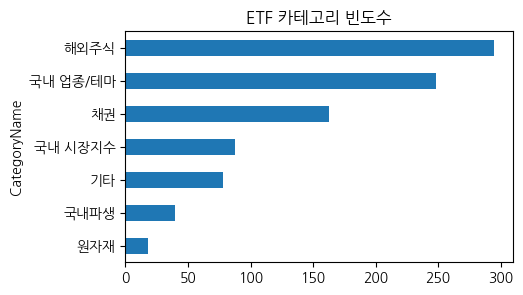

In [174]:
df_etfs['CategoryName'].value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(5,3),title='ETF 카테고리 빈도수')

In [175]:
sns.countplot?

Signature:
sns.countplot(
    data=None,
    *,
    x=None,
    y=None,
    hue=None,
    order=None,
    hue_order=None,
    orient=None,
    color=None,
    palette=None,
    saturation=0.75,
    fill=True,
    hue_norm=None,
    stat='count',
    width=0.8,
    dodge='auto',
    gap=0,
    log_scale=None,
    native_scale=False,
    formatter=None,
    legend='auto',
    ax=None,
    **kwargs,
)
Docstring:
Show the counts of observations in each categorical bin using bars.

A count plot can be thought of as a histogram across a categorical, instead
of quantitative, variable. The basic API and options are identical to those
for :func:`barplot`, so you can compare counts across nested variables.

Note that :func:`histplot` function offers similar functionality with additional
features (e.g. bar stacking), although its default behavior is somewhat different.

See the :ref:`tutorial <categorical_tutorial>` for more information.

.. note::
    By default, this function treats one of the 

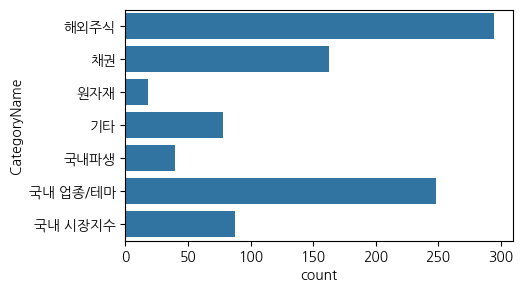

In [176]:
plt.figure(figsize=(5,3))
sns.countplot(data=df_etfs.sort_values(by='CategoryName',ascending=False) , y='CategoryName')
plt.show()

#### 두개 변수 빈도수와 비율

In [177]:
pd.crosstab(df_etfs['인버스'],df_etfs['CategoryName'])

CategoryName,국내 시장지수,국내 업종/테마,국내파생,기타,원자재,채권,해외주식
인버스,,,,,,,
False,88,248,21,73,14,157,285
True,0,0,19,5,4,6,10


In [178]:
pd.crosstab(df_etfs['레버리지'],df_etfs['CategoryName'])

CategoryName,국내 시장지수,국내 업종/테마,국내파생,기타,원자재,채권,해외주식
레버리지,,,,,,,
False,88,242,23,75,18,159,277
True,0,6,17,3,0,4,18


In [179]:
pd.crosstab(df_etfs['헤지'],df_etfs['CategoryName'])

CategoryName,국내 시장지수,국내 업종/테마,국내파생,기타,원자재,채권,해외주식
헤지,,,,,,,
False,88,248,40,75,3,151,262
True,0,0,0,3,15,12,33


<Axes: xlabel='count', ylabel='CategoryName'>

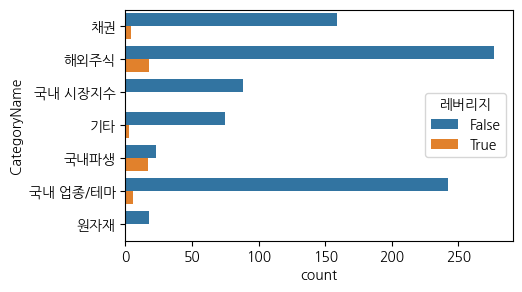

In [180]:
plt.figure(figsize=(5,3))
sns.countplot(data=df_etfs, y='CategoryName', hue='레버리지')

<Axes: xlabel='count', ylabel='Brand'>

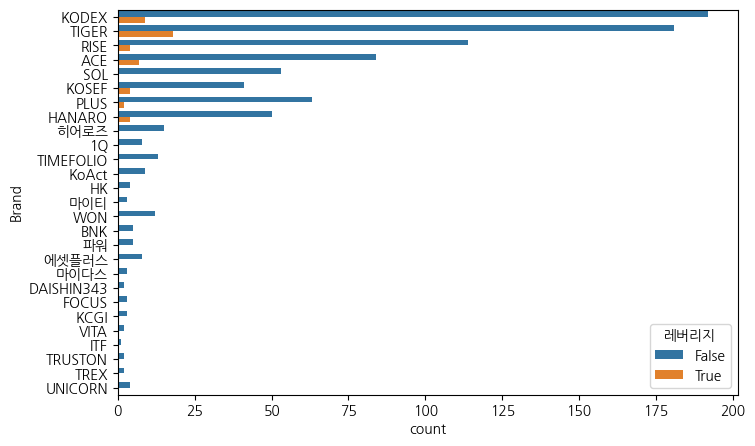

In [181]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_etfs, y='Brand', hue='레버리지')

In [182]:
# 수치형 변수로 히스토그램 그리기

tmp = df_etfs.select_dtypes(np.number).drop(['Symbol','Category','RiseFall'],axis=1)
tmp

,Price,Change,ChangeRate,NAV,EarningRate,Volume,Amount,MarCap
0,1056985,95,0.01,1057017.0,0.8251,36376,38448,93049
1,55400,5,0.01,55395.0,0.8098,18863,1044,69345
2,21625,-50,-0.23,21588.0,17.0672,366127,7914,62799
3,32960,-10,-0.03,33031.0,-3.8692,594313,19562,56114
4,108935,25,0.02,108902.0,0.8005,6236,679,44412
...,...,...,...,...,...,...,...,...
925,7985,0,0.00,7966.0,-3.2708,0,0,16
926,5250,0,0.00,5319.0,-7.2439,0,0,16
927,6510,0,0.00,6584.0,-2.7633,0,0,16
928,16925,0,0.00,16945.0,32.0717,0,0,10


In [183]:
cols = tmp.columns.tolist()
cols

['Price',
 'Change',
 'ChangeRate',
 'NAV',
 'EarningRate',
 'Volume',
 'Amount',
 'MarCap']

In [ ]:
tmp.plot?

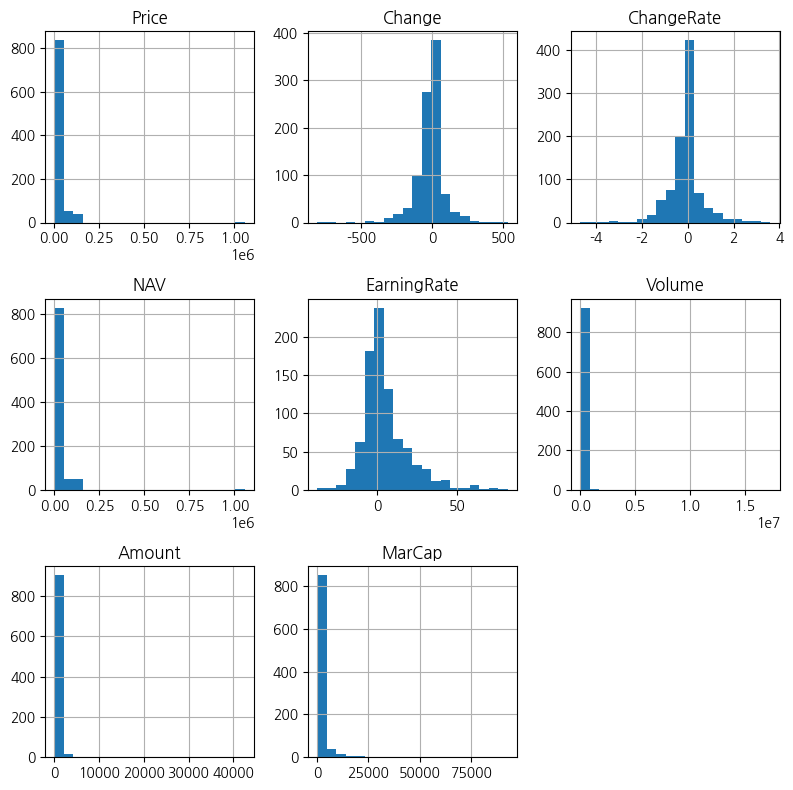

In [185]:
tmp.hist(figsize=(8,8),bins=20)
plt.tight_layout()

#### 수치형 변수의 빈도수 시각화(히스토그램)

<Figure size 1000x1000 with 0 Axes>

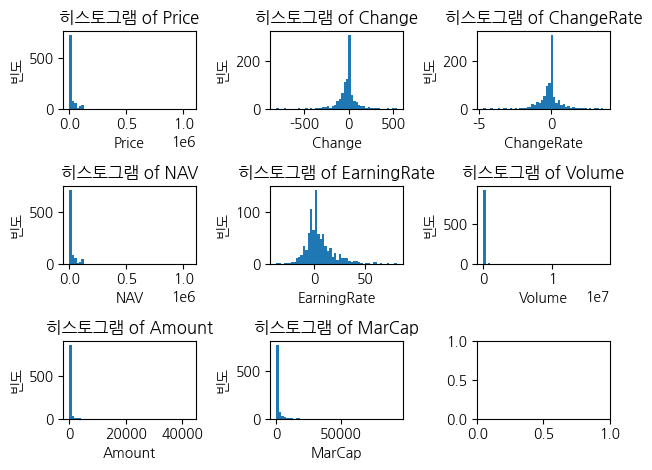

In [186]:
# 서브영역에 개별 차트 그리기

# figure영역 크기 지정
plt.figure(figsize=(10,10))

# 서브플롯 생성
rows , cols = (3 , 3)
fig, axes = plt.subplots(nrows=rows, ncols=cols)

# 컬럼리스트
column_list = tmp.columns.tolist()
idx = 0
stop = False
for i in range(rows):
    for j in range(cols) :
        column_name = column_list[idx]  # 컬럼명
        tmp[column_name].plot(kind='hist',ax=axes[i][j],bins=50) # 영역에 차트 그리기
        axes[i][j].set_title(f'히스토그램 of {column_name}') # 영역 제목
        axes[i][j].set_xlabel(column_name) # x축 라벨
        axes[i][j].set_ylabel('빈도') # y축 라벨
        idx += 1
        if idx == len(column_list) :
            stop = True
            break # 안쪽 루프 종료
    if stop :
        break # 바깥쪽 루프 종료
        
plt.tight_layout() # 서브플롯의 간격 조정
plt.show() # 차트 그리기

In [187]:
df_etfs.columns

Index(['Symbol', 'Category', 'CategoryName', 'Name', 'Price', 'RiseFall',
       'Change', 'ChangeRate', 'NAV', 'EarningRate', 'Volume', 'Amount',
       'MarCap', 'Brand', '인버스', '레버리지', '헤지'],
      dtype='object')

In [188]:
# 각 브랜드별 3개월 수익률의 평균값
# df_etfs.groupby('Brand')['EarningRate'].mean()
df_etfs.groupby('Brand')['EarningRate'].agg('mean').sort_values(ascending=False)

Brand
에셋플러스         23.444075
TIMEFOLIO      9.445245
ACE            8.987072
SOL            6.224291
PLUS           6.210374
KCGI           6.051433
KoAct          5.808457
TIGER          5.806408
KODEX          4.836422
히어로즈           4.795829
WON            4.509427
1Q             4.140260
KOSEF          4.127034
RISE           3.550950
HANARO         1.714260
마이다스           1.713333
TRUSTON       -0.669700
파워            -0.673267
VITA          -2.244000
DAISHIN343    -2.296350
마이티           -2.445233
HK            -2.614675
FOCUS         -3.422133
ITF           -3.487600
TREX          -3.849950
BNK           -6.473350
UNICORN       -8.351467
Name: EarningRate, dtype: float64

In [189]:
df_etfs.query('Brand=="에셋플러스"')[['Name','EarningRate','Category']]

,Name,EarningRate,CategoryName
352,에셋플러스 글로벌플랫폼액티브,47.3856,해외주식
581,에셋플러스 차이나일등기업포커스10액티브,37.1097,해외주식
592,에셋플러스 코리아플랫폼액티브,-0.3135,국내 업종/테마
655,에셋플러스 글로벌대장장이액티브,27.1203,해외주식
688,에셋플러스 글로벌일등기업포커스10액티브,30.6572,해외주식
711,에셋플러스 코리아대장장이액티브,-3.5441,국내 업종/테마
721,에셋플러스 글로벌영에이지액티브,30.6418,해외주식
741,에셋플러스 글로벌다이나믹시니어액티브,18.4956,해외주식
